In [2]:
# conda install export_graphviz

In [37]:
import warnings

warnings.filterwarnings('ignore')

# 사용자 행동 인식 분류기

In [3]:
with open('./human_activity/train/X_train.txt') as f : X_train = f.read()
with open('./human_activity/train/y_train.txt') as f : y_train = f.read()
with open('./human_activity/test/X_test.txt') as f : X_test = f.read()
with open('./human_activity/test/y_test.txt') as f : y_test = f.read()


In [4]:
import pandas as pd

DATA_PATH = "./human_activity"


FEATURE_NAME_PATH = DATA_PATH + '/features.txt'

TRAIN_FEATURE_PATH = DATA_PATH + '/train/X_train.txt'
TRAIN_LABEL_PATH = DATA_PATH + '/train/y_train.txt'

TEST_FEATURE_PATH = DATA_PATH + '/test/X_test.txt'
TEST_LABEL_PATH = DATA_PATH + '/test/y_test.txt'

def get_human_dataset( ):

    def get_new_feature_name_df(old_feature_name_df):
      feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
      feature_dup_df = feature_dup_df.reset_index()
      new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
      new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
      new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
      return new_feature_name_df

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(FEATURE_NAME_PATH, sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(TRAIN_FEATURE_PATH,sep='\s+', names=feature_name )
    X_test = pd.read_csv(TEST_FEATURE_PATH,sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(TRAIN_LABEL_PATH,sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(TEST_LABEL_PATH,sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_5568\376401898.py:25: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv(FEATURE_NAME_PATH, sep='\s+', header=None,names=['column_index','column_name'])
C:\Users\user\AppData\Local\Temp\ipykernel_5568\376401898.py:34: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv(TRAIN_FEATURE_PATH,sep='\s+', names=feature_name )
C:\Users\user\AppData\Local\Temp\ipykernel_5568\376401898.py:35: SyntaxWarning: inval

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

## 일단 정확도 평가

In [6]:
y_predict_test = dt_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

print(dt_clf.score(X_train, y_train))
print(accuracy_score(y_test, y_predict_test))

print("DecisionTreeClassifier :\n", dt_clf.get_params())

1.0
0.8608754665761792
DecisionTreeClassifier :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [6, 8, 10, 12, 16, 20, 24],
    "min_samples_split" : [6, 8, 10, 12, 14, 16]
}

grid_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, return_train_score=True, cv = 7, n_jobs= -1 )


In [9]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [6, 8, 10, 12, 14, 16]},
             return_train_score=True)

In [10]:
print('{0:4f}'.format(grid_dt_clf.best_score_))
print('{}'.format(grid_dt_clf.best_params_))
grid_result = pd.DataFrame(grid_dt_clf.cv_results_, columns= ['param_max_depth', 'param_min_samples_split', 'mean_test_score'])
grid_result

0.871197
{'max_depth': 8, 'min_samples_split': 6}


,param_max_depth,param_min_samples_split,mean_test_score
0,6,6,0.857726
1,6,8,0.857318
2,6,10,0.861672
3,6,12,0.858135
4,6,14,0.856230
5,6,16,0.856230
6,8,6,0.871197
7,8,8,0.866571
8,8,10,0.863033
9,8,12,0.866707


In [11]:
list(y_train.drop_duplicates()['action']).sort()

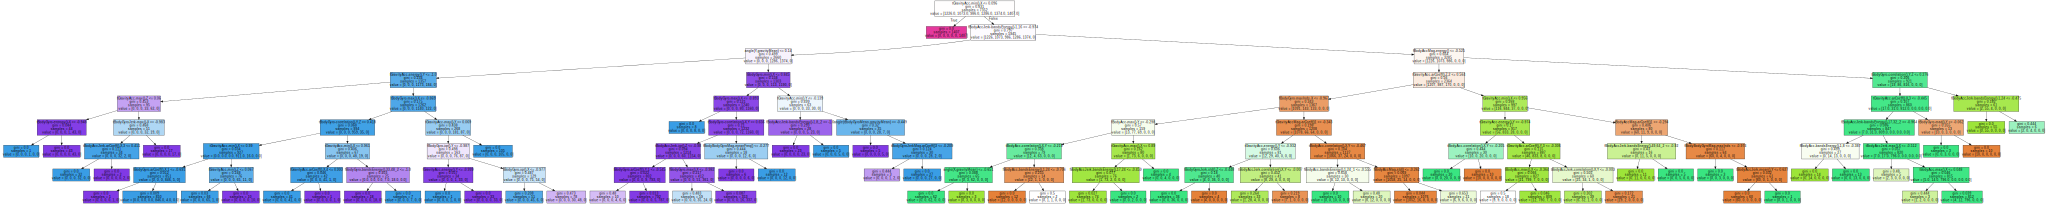

In [12]:
from sklearn.tree import export_graphviz
dt_clf_setting = DecisionTreeClassifier(max_depth = 8, min_samples_split=10).fit(X_train, y_train)
export_graphviz(
    dt_clf_setting, #시각화 할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names= list(y_train.drop_duplicates()['action']).sort(), # 각 클래스의 문자열로 구성된 이름
    feature_names= X_train.columns, # 각 특성으 ㅣ문자열로 구성된 이름
    impurity=True,
    filled = True
)

import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)


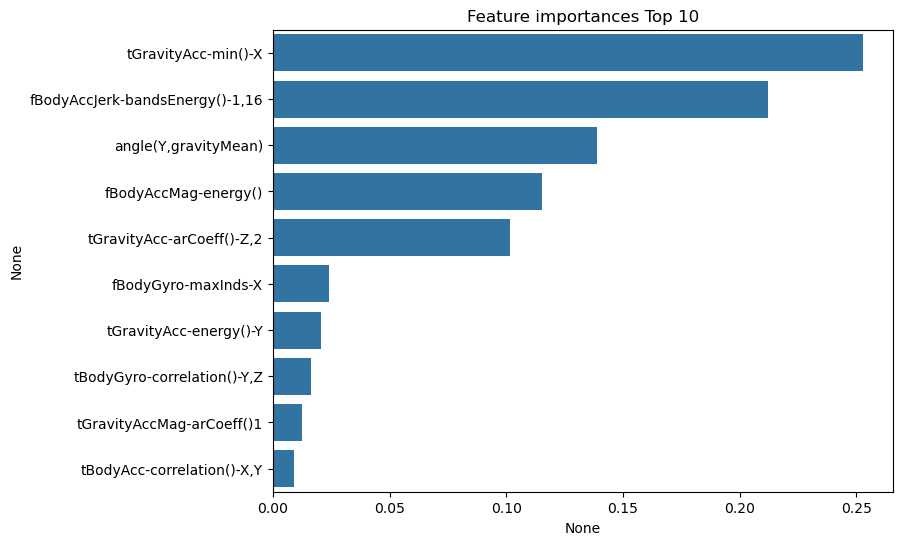

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):
  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns)
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:10]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if 10 == None else 10}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()
plot_feature_importance(dt_clf_setting, X_train.columns)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rc_clf = RandomForestClassifier(n_estimators=5, random_state=2)

rc_clf.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=5, random_state=2)

In [36]:
from sklearn.metrics import accuracy_score
pred = rc_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8832711231761113

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [10, 50, 100]
}

grid_rc_clf = GridSearchCV(
    RandomForestClassifier(random_state=30),
    param_grid=param_grid,
    scoring = 'accuracy',
    n_jobs= -1,
    cv = 5
)

grid_rc_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [42]:
print(grid_rc_clf.best_score_)
print(grid_rc_clf.best_params_)

0.9209772610607805
{'n_estimators': 100}


In [46]:
pd.DataFrame(grid_rc_clf.cv_results_)[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.908055
1,50,0.920432
2,100,0.920977


In [47]:
pred = grid_rc_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9229725144214456

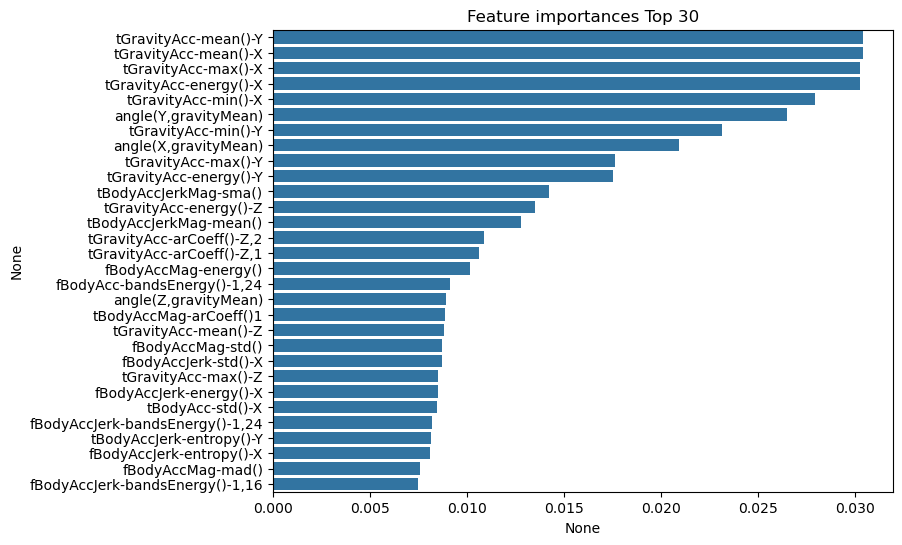

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:30]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if 30 == None else 30}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()
plot_feature_importance(grid_rc_clf.best_estimator_, X_train.columns)